## 01. package load

In [1]:
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
sys.path.append(os.pardir)
from models.cnn_kr import CNNClassifier
from models.word_embedding import get_embedding_matrix

### local gpu setting

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

### Assing data path

In [3]:
DATA_IN_PATH = '../assets/data/npy_data/2020-05-31/'
DATA_OUT_PATH = '../model_save/cnn_model/'
# Data save label
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'
DATA_CONFIGS = 'data_configs.json'
SEQ_CONFIGS = 'seq_configs_bt.json'

# Train label save file name
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_LABEL_SMALL = 'train_label_small.npy'
TEST_LABEL_DATA = 'test_label.npy'
TEST_LABEL_DATA_SMALL = 'test_label_small.npy'

### set cnn parameter

## CNN train module parameter

+ parameter and default value

    embedding_matrix=None (word2vec or doc2vec weight matrix)  
    vocab_size=None  (train vocab size)  
    pre_trained_mode=None ('d2v', 'w2v', 'pt_w2v')  
    num_filters=128  
    hidden_dimension=1000  
    dropout_rate=0.5  
    batch_size = 512  
    num_epochs = 1000  
    valid_split = 0.2  
    optimizer = 'adam'  ('adam' or 'radam')  
    train_mode='rand ' ('rand', 'static', 'non-static') 
    
    
+ pt_w2v is pre-trained word2vec which is trained korean wikipedia doctumentation(document size : 420000) 
+ embedding_matrix and pre_trained_mode cannot assign when train_mode is 'rand'
+ embedding_matrix and pre_trained_mode can assign when train_mode is 'static' or 'non-statc'

In [4]:
from notebook_example.test_package.cnn_train import CNNTrain

## 02. Load  Data and make embedding matrix

+ Load embedding data

In [5]:
d2v_model_name = '../model_save/embedding_model/Doc2vec_new.model'
doc_vectorizer = Doc2Vec.load(d2v_model_name)

w2v_model_name = '../model_save/embedding_model/Word2vec1.model'
word_vectorizer = Word2Vec.load(w2v_model_name)

pre_trained_name = '../model_save/embedding_model/trained_word2vec1.model'
pre_trained_w2v = Word2Vec.load(pre_trained_name)

+ Load data

In [6]:
train_X = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_Y = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
test_X = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_Y = np.load(open(DATA_IN_PATH + TEST_LABEL_DATA, 'rb'))
train_YS = tf.one_hot(train_Y, 43)
test_YS = tf.one_hot(test_Y, 43)
data_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))
vocab_size = data_configs['vocab_size'] + 1
print("vocab_size : ", vocab_size)
word_index = data_configs['vocab']

vocab_size :  30079


##  03. CNN-rand

## optimizer adam

In [7]:
cnn_train_rand = CNNTrain(vocab_size=vocab_size)

big_class
output_dim :  43
./model_save/cnn_model/
train_mode : rand, optimizer : adam, pre-trained_mode : None, trainable: True, model_name : cnn_rand_adam


In [8]:
model, histroy = cnn_train_rand.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'rand', 'output_dimension': 43, 'model_name': 'cnn_rand_adam', 'trainable': True}
./model_save/cnn_model/cnn_rand_adam -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] - ETA: 0s - loss: 3.2814 - accuracy: 0.1452 - f1_score: 0.0695
Epoch 00001: val_accuracy improved from -inf to 0.39713, saving model to ./model_save/cnn_model/cnn_rand_adam/weights.h5
135/135 [==============================] - 23s 169ms/step - loss: 3.2814 - accuracy: 0.1452 - f1_score: 0.0695 - val_loss: 2.3807 - val_accuracy: 0.3971 - val_f1_score: 0.2123
Epoch 2/1000
135/135 [==============================] - ETA: 0s - loss: 1.5395 - accuracy: 0.5912 - f1_score: 0.4114
Epoch 00002: val_accuracy improved from 0.39713 to 0.69138, saving model to ./model_save/cnn_model/cnn_rand_adam/weights.h5
135/135 [==============================] - 21s 158ms/step - 

Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9998 - f1_score: 0.9998
Epoch 00022: val_accuracy did not improve from 0.85171
135/135 [==============================] - 10s 75ms/step - loss: 0.0023 - accuracy: 0.9998 - f1_score: 0.9998 - val_loss: 0.8408 - val_accuracy: 0.8503 - val_f1_score: 0.8191
Epoch 23/1000
135/135 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9998 - f1_score: 0.9998
Epoch 00023: val_accuracy did not improve from 0.85171
135/135 [==============================] - 10s 75ms/step - loss: 0.0023 - accuracy: 0.9998 - f1_score: 0.9998 - val_loss: 0.8443 - val_accuracy: 0.8503 - val_f1_score: 0.8194
Epoch 24/1000
135/135 [==============================] - ETA: 0s - loss: 5.4524e-04 - accuracy: 0.9999 - f1_score: 0.9999
Epoch 00024: val_accuracy did not improve from 0.85171
135/135 [==============================] - 10s 74ms/step - loss: 5.4524e-04 - accuracy: 0.9999 - f1_score: 0.9999 - val_loss: 0

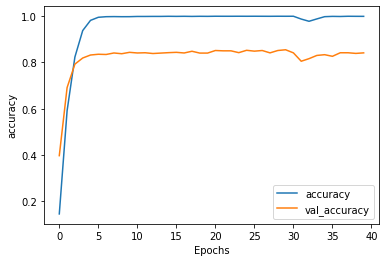

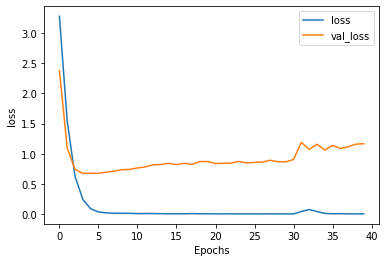

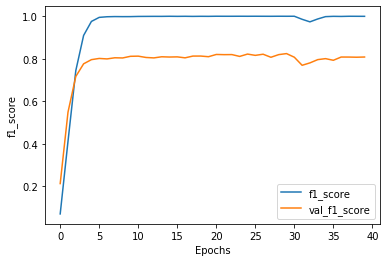

In [9]:
cnn_train_rand.train_plot(model, histroy)

In [10]:
cnn_train_rand.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.8318 - accuracy: 0.8456 - f1_score: 0.8200


## optimizer radam

In [11]:
cnn_train_rand = CNNTrain(vocab_size=vocab_size, optimizer='radam')

big_class
output_dim :  43
./model_save/cnn_model/
train_mode : rand, optimizer : radam, pre-trained_mode : None, trainable: True, model_name : cnn_rand_radam


In [12]:
model, histroy = cnn_train_rand.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'rand', 'output_dimension': 43, 'model_name': 'cnn_rand_radam', 'trainable': True}
./model_save/cnn_model/cnn_rand_radam -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] - ETA: 0s - loss: 3.6195 - accuracy: 0.0609 - f1_score: 0.0090
Epoch 00001: val_accuracy improved from -inf to 0.06812, saving model to ./model_save/cnn_model/cnn_rand_radam/weights.h5
135/135 [==============================] - 17s 128ms/step - loss: 3.6195 - accuracy: 0.0609 - f1_score: 0.0090 - val_loss: 3.5728 - val_accuracy: 0.0681 - val_f1_score: 0.0030
Epoch 2/1000
135/135 [==============================] - ETA: 0s - loss: 3.4769 - accuracy: 0.1115 - f1_score: 0.0262
Epoch 00002: val_accuracy improved from 0.06812 to 0.22150, saving model to ./model_save/cnn_model/cnn_rand_radam/weights.h5
135/135 [==============================] - 17s 127ms/ste

Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9971 - f1_score: 0.9969
Epoch 00021: val_accuracy did not improve from 0.81325
135/135 [==============================] - 16s 122ms/step - loss: 0.0139 - accuracy: 0.9971 - f1_score: 0.9969 - val_loss: 0.8539 - val_accuracy: 0.8105 - val_f1_score: 0.7679
Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9979 - f1_score: 0.9977
Epoch 00022: val_accuracy improved from 0.81325 to 0.82067, saving model to ./model_save/cnn_model/cnn_rand_radam/weights.h5
135/135 [==============================] - 17s 126ms/step - loss: 0.0105 - accuracy: 0.9979 - f1_score: 0.9977 - val_loss: 0.8632 - val_accuracy: 0.8207 - val_f1_score: 0.7871
Epoch 23/1000
135/135 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9986 - f1_score: 0.9982
Epoch 00023: val_accuracy did not improve from 0.82067
135/135 [==============================] - 16s 122ms/step -

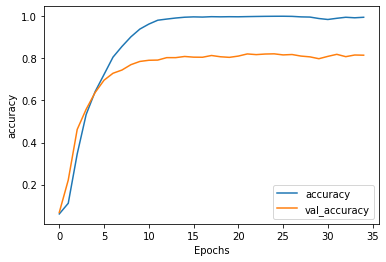

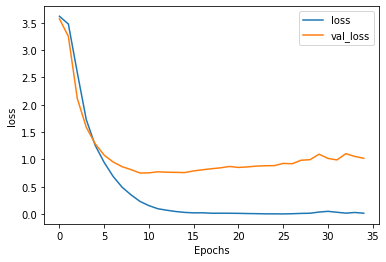

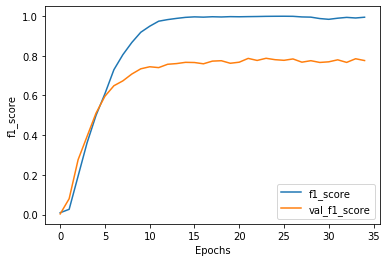

In [13]:
cnn_train_rand.train_plot(model, histroy)

In [14]:
cnn_train_rand.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 20ms/step - loss: 0.8999 - accuracy: 0.8224 - f1_score: 0.7965: 2s - loss: 0.8222 - accuracy: 0.8356 - f1_scor - ETA: 1s - loss: 0.8607 - accu


## 04. CNN static(w2v)

### optimizer adam

In [15]:
cnn_train_static_w2v = CNNTrain(vocab_size=vocab_size, 
                                train_mode='static', 
                                embedding_matrix=word_vectorizer,
                                word_index=word_index,
                                pre_trained_mode='w2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
27423 2655
train_mode : static, optimizer : adam, pre-trained_mode : w2v, trainable: False, model_name : cnn_static_adam_w2v


In [16]:
model, histroy = cnn_train_static_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'static', 'output_dimension': 43, 'model_name': 'cnn_static_adam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]]), 'trainable': False}
./model_save/cnn_model/cnn_static_adam_w2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] - ETA: 0s - 

Epoch 19/1000
134/135 [============================>.] - ETA: 0s - loss: 0.1183 - accuracy: 0.9611 - f1_score: 0.9545- ETA: 0s - loss: 0.1194 - accuracy: 0.9608 - f1_score: 0.954
Epoch 00019: val_accuracy did not improve from 0.83086
135/135 [==============================] - 2s 14ms/step - loss: 0.1180 - accuracy: 0.9611 - f1_score: 0.9547 - val_loss: 0.6516 - val_accuracy: 0.8253 - val_f1_score: 0.7851
Epoch 20/1000
133/135 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9668 - f1_score: 0.9634
Epoch 00020: val_accuracy did not improve from 0.83086
135/135 [==============================] - 2s 14ms/step - loss: 0.1044 - accuracy: 0.9665 - f1_score: 0.9632 - val_loss: 0.6405 - val_accuracy: 0.8285 - val_f1_score: 0.7943
Epoch 21/1000
133/135 [============================>.] - ETA: 0s - loss: 0.1226 - accuracy: 0.9586 - f1_score: 0.9531
Epoch 00021: val_accuracy did not improve from 0.83086
135/135 [==============================] - 2s 14ms/step - loss: 0.1229 -

Epoch 42/1000
134/135 [============================>.] - ETA: 0s - loss: 0.0692 - accuracy: 0.9777 - f1_score: 0.9743- ETA: 0s - loss: 0.0700 - accuracy: 0.9773 - f1_score: 0.97
Epoch 00042: val_accuracy did not improve from 0.83781
135/135 [==============================] - 2s 14ms/step - loss: 0.0704 - accuracy: 0.9774 - f1_score: 0.9740 - val_loss: 0.7789 - val_accuracy: 0.8341 - val_f1_score: 0.8022
Epoch 43/1000
135/135 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9751 - f1_score: 0.9754
Epoch 00043: val_accuracy improved from 0.83781 to 0.83874, saving model to ./model_save/cnn_model/cnn_static_adam_w2v/weights.h5
135/135 [==============================] - 2s 16ms/step - loss: 0.0776 - accuracy: 0.9751 - f1_score: 0.9754 - val_loss: 0.7980 - val_accuracy: 0.8387 - val_f1_score: 0.8091
Epoch 44/1000
134/135 [============================>.] - ETA: 0s - loss: 0.0792 - accuracy: 0.9746 - f1_score: 0.9740
Epoch 00044: val_accuracy did not improve from 0.8387

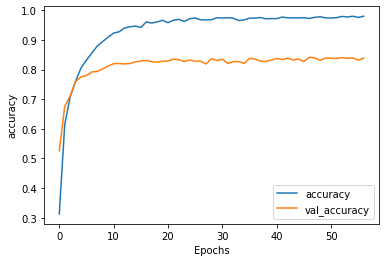

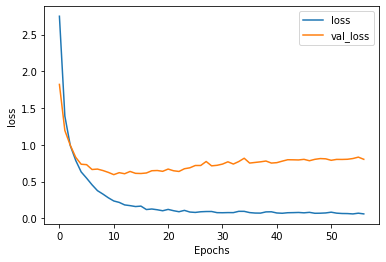

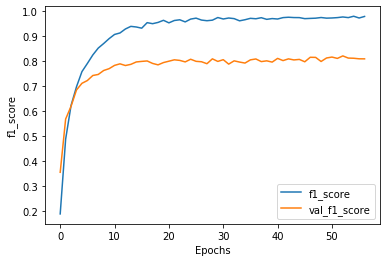

In [17]:
cnn_train_static_w2v.train_plot(model, histroy)

In [18]:
cnn_train_static_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.6928 - accuracy: 0.8516 - f1_score: 0.8356


### optimizer radam

In [19]:
cnn_train_static_w2v = CNNTrain(vocab_size=vocab_size, 
                                train_mode='static', 
                                embedding_matrix=word_vectorizer,
                                optimizer='radam',
                                word_index=word_index,
                                pre_trained_mode='w2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
27423 2655
train_mode : static, optimizer : radam, pre-trained_mode : w2v, trainable: False, model_name : cnn_static_radam_w2v


In [20]:
model, histroy = cnn_train_static_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'static', 'output_dimension': 43, 'model_name': 'cnn_static_radam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]]), 'trainable': False}
./model_save/cnn_model/cnn_static_radam_w2v -- Folder create complete 

callback set
Epoch 1/1000
134/135 [============================>.] - ETA: 0s 

Epoch 19/1000
132/135 [============================>.] - ETA: 0s - loss: 0.1690 - accuracy: 0.9471 - f1_score: 0.9367
Epoch 00019: val_accuracy did not improve from 0.82252
135/135 [==============================] - 2s 16ms/step - loss: 0.1693 - accuracy: 0.9469 - f1_score: 0.9363 - val_loss: 0.6374 - val_accuracy: 0.8221 - val_f1_score: 0.7788
Epoch 20/1000
134/135 [============================>.] - ETA: 0s - loss: 0.1544 - accuracy: 0.9486 - f1_score: 0.9407
Epoch 00020: val_accuracy did not improve from 0.82252
135/135 [==============================] - 2s 15ms/step - loss: 0.1537 - accuracy: 0.9488 - f1_score: 0.9409 - val_loss: 0.6368 - val_accuracy: 0.8165 - val_f1_score: 0.7794
Epoch 21/1000
131/135 [============================>.] - ETA: 0s - loss: 0.1578 - accuracy: 0.9478 - f1_score: 0.9392
Epoch 00021: val_accuracy improved from 0.82252 to 0.82391, saving model to ./model_save/cnn_model/cnn_static_radam_w2v/weights.h5
135/135 [==============================] - 2s 17ms/step -

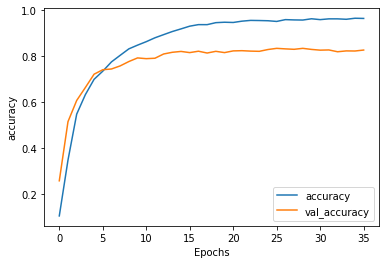

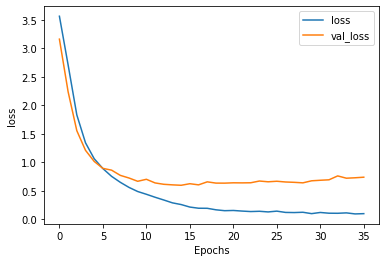

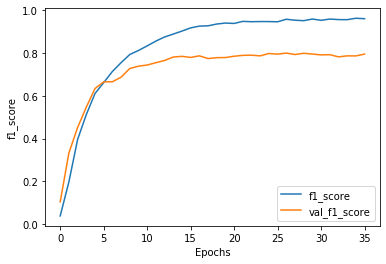

In [21]:
cnn_train_static_w2v.train_plot(model, histroy)

In [22]:
cnn_train_static_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.6348 - accuracy: 0.8423 - f1_score: 0.8192A: 0s - loss: 0.6392 - accuracy: 0.8442 - f1_score: 


## 05. CNN static(d2v)

### optimizer adam

In [23]:
cnn_train_static_d2v = CNNTrain(vocab_size=vocab_size, 
                                train_mode='static', 
                                embedding_matrix=doc_vectorizer,
                                word_index=word_index,
                                pre_trained_mode='d2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
29582 496
train_mode : static, optimizer : adam, pre-trained_mode : d2v, trainable: False, model_name : cnn_static_adam_d2v


In [24]:
model, histroy = cnn_train_static_d2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'static', 'output_dimension': 43, 'model_name': 'cnn_static_adam_d2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92332149,  0.07046572, -0.11218019, ..., -0.90327078,
        -1.37625957,  0.42820612],
       [ 0.63682806,  0.139101  , -0.00578027, ...,  0.24532194,
        -0.9702155 ,  0.07838579],
       ...,
       [ 0.65864688, -0.21765059, -0.18377091, ...,  1.63431156,
        -0.64432347, -0.49664205],
       [-0.0473938 ,  0.43745145,  0.08863429, ..., -0.00531029,
         0.05797287, -0.49470472],
       [-0.37837368,  0.21734855, -0.05201286, ...,  0.09690577,
         0.74238676,  0.81506521]]), 'trainable': False}
./model_save/cnn_model/cnn_static_adam_d2v -- Folder create complete 

callback set
Epoch 1/1000
134/135 [============================>.] - ETA: 0s - 

Epoch 20/1000
130/135 [===========================>..] - ETA: 0s - loss: 0.2031 - accuracy: 0.9346 - f1_score: 0.9247
Epoch 00020: val_accuracy improved from 0.80491 to 0.80677, saving model to ./model_save/cnn_model/cnn_static_adam_d2v/weights.h5
135/135 [==============================] - 2s 15ms/step - loss: 0.2050 - accuracy: 0.9338 - f1_score: 0.9247 - val_loss: 0.8219 - val_accuracy: 0.8068 - val_f1_score: 0.7730
Epoch 21/1000
134/135 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9275 - f1_score: 0.9169
Epoch 00021: val_accuracy improved from 0.80677 to 0.81325, saving model to ./model_save/cnn_model/cnn_static_adam_d2v/weights.h5
135/135 [==============================] - 2s 16ms/step - loss: 0.2222 - accuracy: 0.9276 - f1_score: 0.9170 - val_loss: 0.8158 - val_accuracy: 0.8133 - val_f1_score: 0.7807
Epoch 22/1000
133/135 [============================>.] - ETA: 0s - loss: 0.1769 - accuracy: 0.9416 - f1_score: 0.9308
Epoch 00022: val_accuracy did not impr

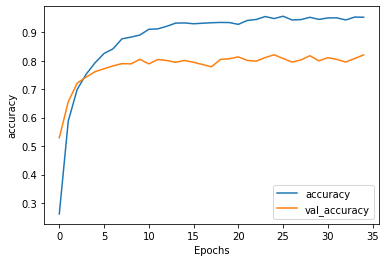

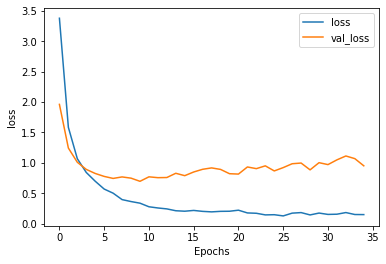

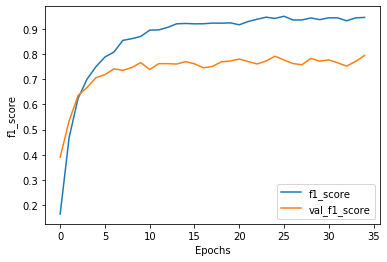

In [25]:
cnn_train_static_d2v.train_plot(model, histroy)

In [26]:
cnn_train_static_d2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.8785 - accuracy: 0.8181 - f1_score: 0.7951


### optimizer radam

In [27]:
cnn_train_static_d2v = CNNTrain(vocab_size=vocab_size, 
                                train_mode='static', 
                                embedding_matrix=doc_vectorizer,
                                word_index=word_index,
                                optimizer='radam',
                                pre_trained_mode='d2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
29582 496
train_mode : static, optimizer : radam, pre-trained_mode : d2v, trainable: False, model_name : cnn_static_radam_d2v


In [28]:
model, histroy = cnn_train_static_d2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'static', 'output_dimension': 43, 'model_name': 'cnn_static_radam_d2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92332149,  0.07046572, -0.11218019, ..., -0.90327078,
        -1.37625957,  0.42820612],
       [ 0.63682806,  0.139101  , -0.00578027, ...,  0.24532194,
        -0.9702155 ,  0.07838579],
       ...,
       [ 0.65864688, -0.21765059, -0.18377091, ...,  1.63431156,
        -0.64432347, -0.49664205],
       [-0.0473938 ,  0.43745145,  0.08863429, ..., -0.00531029,
         0.05797287, -0.49470472],
       [-0.37837368,  0.21734855, -0.05201286, ...,  0.09690577,
         0.74238676,  0.81506521]]), 'trainable': False}
./model_save/cnn_model/cnn_static_radam_d2v -- Folder create complete 

callback set
Epoch 1/1000
132/135 [============================>.] - ETA: 0s 

Epoch 20/1000
131/135 [============================>.] - ETA: 0s - loss: 0.2276 - accuracy: 0.9243 - f1_score: 0.9158- ETA: 1s - loss: 0.2142 - accuracy: 0.928
Epoch 00020: val_accuracy did not improve from 0.80306
135/135 [==============================] - 2s 15ms/step - loss: 0.2314 - accuracy: 0.9230 - f1_score: 0.9138 - val_loss: 0.8370 - val_accuracy: 0.7901 - val_f1_score: 0.7469
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9204 - f1_score: 0.9108
Epoch 00021: val_accuracy did not improve from 0.80306
135/135 [==============================] - 2s 15ms/step - loss: 0.2476 - accuracy: 0.9204 - f1_score: 0.9108 - val_loss: 0.8704 - val_accuracy: 0.7966 - val_f1_score: 0.7657
Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9252 - f1_score: 0.9174
Epoch 00022: val_accuracy did not improve from 0.80306
135/135 [==============================] - 2s 15ms/step - loss: 0.2366 - accuracy: 0.9252 -

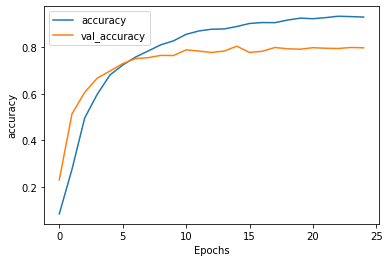

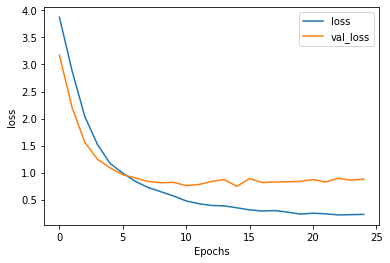

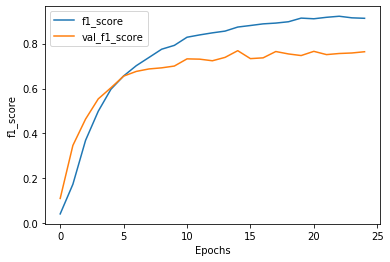

In [29]:
cnn_train_static_d2v.train_plot(model, histroy)

In [30]:
cnn_train_static_d2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.6860 - accuracy: 0.8183 - f1_score: 0.7941


## 06. CNN non-static(w2v)

### optimizer adam

In [31]:
cnn_train_non_static_w2v = CNNTrain(vocab_size=vocab_size, 
                                    train_mode='non_static', 
                                    embedding_matrix=word_vectorizer,
                                    word_index=word_index,
                                    pre_trained_mode='w2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
27423 2655
train_mode : non_static, optimizer : adam, pre-trained_mode : w2v, trainable: True, model_name : cnn_non_static_adam_w2v


In [32]:
model, histroy = cnn_train_non_static_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 43, 'model_name': 'cnn_non_static_adam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]]), 'trainable': True}
./model_save/cnn_model/cnn_non_static_adam_w2v -- Folder already exists 

callback set
Epoch 1/1000
135/135 [==============================] - 

135/135 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9944 - f1_score: 0.9945
Epoch 00019: val_accuracy did not improve from 0.85774
135/135 [==============================] - 11s 79ms/step - loss: 0.0207 - accuracy: 0.9944 - f1_score: 0.9945 - val_loss: 0.6650 - val_accuracy: 0.8526 - val_f1_score: 0.8223
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9972 - f1_score: 0.9970
Epoch 00020: val_accuracy did not improve from 0.85774
135/135 [==============================] - 11s 78ms/step - loss: 0.0113 - accuracy: 0.9972 - f1_score: 0.9970 - val_loss: 0.6419 - val_accuracy: 0.8577 - val_f1_score: 0.8265
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9965 - f1_score: 0.9964
Epoch 00021: val_accuracy did not improve from 0.85774
135/135 [==============================] - 11s 79ms/step - loss: 0.0135 - accuracy: 0.9965 - f1_score: 0.9964 - val_loss: 0.6493 - val_accuracy: 

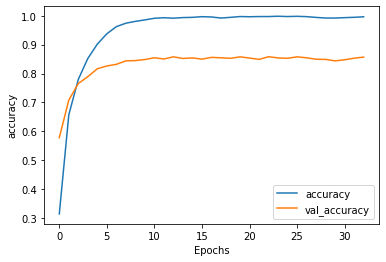

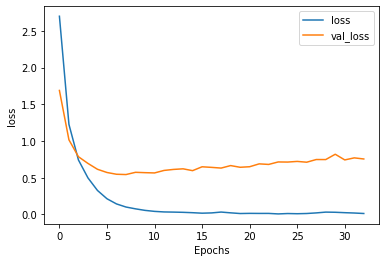

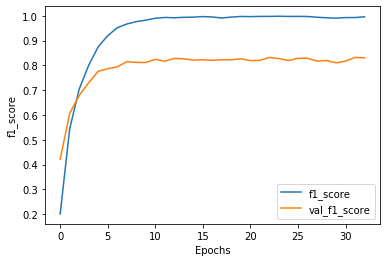

In [33]:
cnn_train_non_static_w2v.train_plot(model, histroy)

In [34]:
cnn_train_non_static_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.6180 - accuracy: 0.8733 - f1_score: 0.8592


### optimizer radam

In [37]:
cnn_train_non_static_w2v = CNNTrain(vocab_size=vocab_size, 
                                train_mode='non_static', 
                                optimizer='radam',
                                word_index=word_index,
                                embedding_matrix=word_vectorizer,
                                pre_trained_mode='w2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
27423 2655
train_mode : non_static, optimizer : radam, pre-trained_mode : w2v, trainable: True, model_name : cnn_non_static_radam_w2v


In [38]:
model, histroy = cnn_train_non_static_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 43, 'model_name': 'cnn_non_static_radam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]]), 'trainable': True}
./model_save/cnn_model/cnn_non_static_radam_w2v -- Folder already exists 

callback set
Epoch 1/1000
135/135 [==============================] 

Epoch 18/1000
135/135 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9739 - f1_score: 0.9675
Epoch 00018: val_accuracy did not improve from 0.84801
135/135 [==============================] - 16s 119ms/step - loss: 0.0882 - accuracy: 0.9739 - f1_score: 0.9675 - val_loss: 0.5481 - val_accuracy: 0.8392 - val_f1_score: 0.8110
Epoch 19/1000
135/135 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.9771 - f1_score: 0.9737
Epoch 00019: val_accuracy improved from 0.84801 to 0.85079, saving model to ./model_save/cnn_model/cnn_non_static_radam_w2v/weights.h5
135/135 [==============================] - 16s 122ms/step - loss: 0.0771 - accuracy: 0.9771 - f1_score: 0.9737 - val_loss: 0.5577 - val_accuracy: 0.8508 - val_f1_score: 0.8209
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0768 - accuracy: 0.9772 - f1_score: 0.9740
Epoch 00020: val_accuracy did not improve from 0.85079
135/135 [==============================] - 17s 12

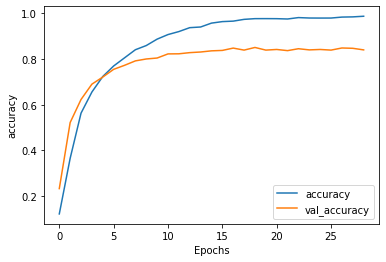

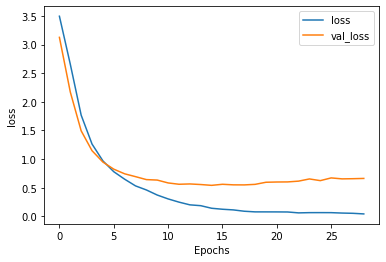

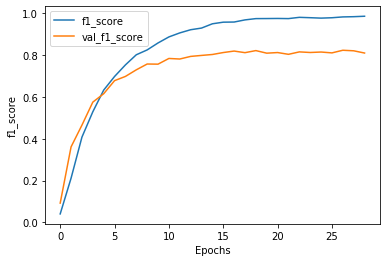

In [39]:
cnn_train_non_static_w2v.train_plot(model, histroy)

In [40]:
cnn_train_non_static_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 20ms/step - loss: 0.5461 - accuracy: 0.8592 - f1_score: 0.8414


## 06-1 CNN non-static(w2v-pretrained)

### optimizer adam

In [41]:
cnn_train_non_static_w2v_pt = CNNTrain(vocab_size=vocab_size, 
                                        train_mode='non_static', 
                                        embedding_matrix=pre_trained_w2v,
                                        word_index=word_index,
                                        pre_trained_mode='pt_w2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
28173 1905
train_mode : non_static, optimizer : adam, pre-trained_mode : pt_w2v, trainable: True, model_name : cnn_non_static_adam_pt_w2v


In [42]:
model, histroy = cnn_train_non_static_w2v_pt.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 43, 'model_name': 'cnn_non_static_adam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]]), 'trainable': True}
./model_save/cnn_model/cnn_non_static_adam_pt_w2v -- Folder already exists 

callback set
Epoch 1/1000
135/135 [============================

135/135 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9951 - f1_score: 0.9950
Epoch 00019: val_accuracy did not improve from 0.85449
135/135 [==============================] - 10s 77ms/step - loss: 0.0188 - accuracy: 0.9951 - f1_score: 0.9950 - val_loss: 0.6538 - val_accuracy: 0.8485 - val_f1_score: 0.8304
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9946 - f1_score: 0.9946
Epoch 00020: val_accuracy did not improve from 0.85449
135/135 [==============================] - 10s 77ms/step - loss: 0.0209 - accuracy: 0.9946 - f1_score: 0.9946 - val_loss: 0.6472 - val_accuracy: 0.8485 - val_f1_score: 0.8211
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9957 - f1_score: 0.9957
Epoch 00021: val_accuracy did not improve from 0.85449
135/135 [==============================] - 10s 77ms/step - loss: 0.0177 - accuracy: 0.9957 - f1_score: 0.9957 - val_loss: 0.6832 - val_accuracy: 

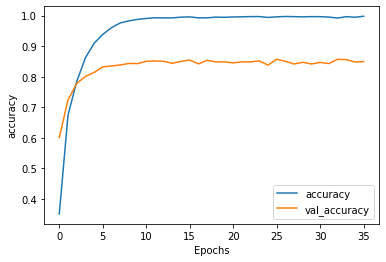

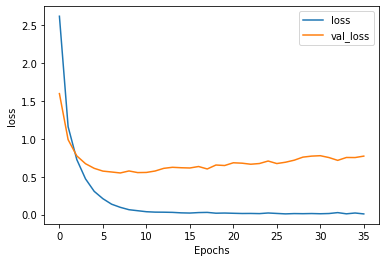

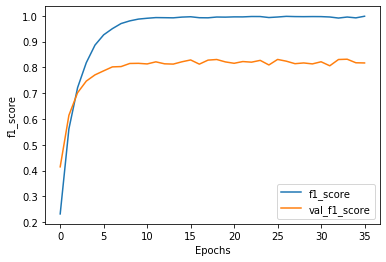

In [43]:
cnn_train_non_static_w2v_pt.train_plot(model, histroy)

In [44]:
cnn_train_non_static_w2v_pt.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.6159 - accuracy: 0.8676 - f1_score: 0.8527


### optimizer radam

In [45]:
cnn_train_non_static_w2v_pt = CNNTrain(vocab_size=vocab_size, 
                                        train_mode='non_static', 
                                        optimizer='radam',
                                        embedding_matrix=pre_trained_w2v,
                                        word_index=word_index,
                                        pre_trained_mode='pt_w2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
28173 1905
train_mode : non_static, optimizer : radam, pre-trained_mode : pt_w2v, trainable: True, model_name : cnn_non_static_radam_pt_w2v


In [46]:
model, histroy = cnn_train_non_static_w2v_pt.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 43, 'model_name': 'cnn_non_static_radam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]]), 'trainable': True}
./model_save/cnn_model/cnn_non_static_radam_pt_w2v -- Folder already exists 

callback set
Epoch 1/1000
135/135 [==========================

Epoch 19/1000
135/135 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9781 - f1_score: 0.9752
Epoch 00019: val_accuracy did not improve from 0.84430
135/135 [==============================] - 17s 123ms/step - loss: 0.0730 - accuracy: 0.9781 - f1_score: 0.9752 - val_loss: 0.6050 - val_accuracy: 0.8281 - val_f1_score: 0.7937
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0681 - accuracy: 0.9802 - f1_score: 0.9780
Epoch 00020: val_accuracy did not improve from 0.84430
135/135 [==============================] - 17s 123ms/step - loss: 0.0681 - accuracy: 0.9802 - f1_score: 0.9780 - val_loss: 0.5766 - val_accuracy: 0.8424 - val_f1_score: 0.8140
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9815 - f1_score: 0.9810
Epoch 00021: val_accuracy did not improve from 0.84430
135/135 [==============================] - 17s 123ms/step - loss: 0.0632 - accuracy: 0.9815 - f1_score: 0.9810 - val_loss: 0.5735

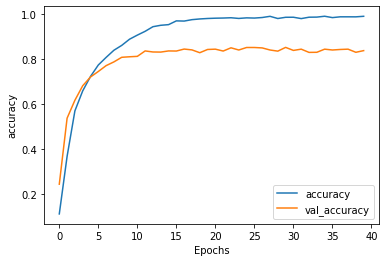

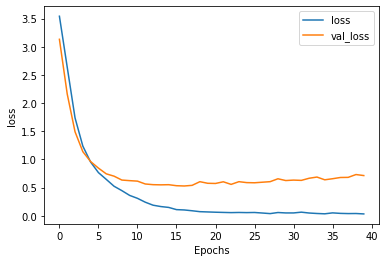

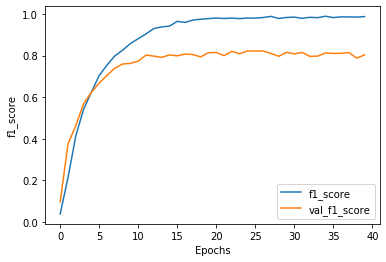

In [47]:
cnn_train_non_static_w2v_pt.train_plot(model, histroy)

In [48]:
cnn_train_non_static_w2v_pt.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 20ms/step - loss: 0.5931 - accuracy: 0.8635 - f1_score: 0.8431


## 07. CNN non-static(d2v)

### optimizer adam

In [49]:
cnn_train_non_static_d2v = CNNTrain(vocab_size=vocab_size, 
                                    train_mode='non_static', 
                                    embedding_matrix=doc_vectorizer,
                                    word_index=word_index,
                                    pre_trained_mode='d2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
29582 496
train_mode : non_static, optimizer : adam, pre-trained_mode : d2v, trainable: True, model_name : cnn_non_static_adam_d2v


In [50]:
model, histroy = cnn_train_non_static_d2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 43, 'model_name': 'cnn_non_static_adam_d2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92332149,  0.07046572, -0.11218019, ..., -0.90327078,
        -1.37625957,  0.42820612],
       [ 0.63682806,  0.139101  , -0.00578027, ...,  0.24532194,
        -0.9702155 ,  0.07838579],
       ...,
       [ 0.65864688, -0.21765059, -0.18377091, ...,  1.63431156,
        -0.64432347, -0.49664205],
       [-0.0473938 ,  0.43745145,  0.08863429, ..., -0.00531029,
         0.05797287, -0.49470472],
       [-0.37837368,  0.21734855, -0.05201286, ...,  0.09690577,
         0.74238676,  0.81506521]]), 'trainable': True}
./model_save/cnn_model/cnn_non_static_adam_d2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] -

Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.9603 - f1_score: 0.9529
Epoch 00020: val_accuracy improved from 0.82113 to 0.82206, saving model to ./model_save/cnn_model/cnn_non_static_adam_d2v/weights.h5
135/135 [==============================] - 11s 79ms/step - loss: 0.1214 - accuracy: 0.9603 - f1_score: 0.9529 - val_loss: 0.8150 - val_accuracy: 0.8221 - val_f1_score: 0.7843
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9644 - f1_score: 0.9600
Epoch 00021: val_accuracy did not improve from 0.82206
135/135 [==============================] - 11s 79ms/step - loss: 0.1160 - accuracy: 0.9644 - f1_score: 0.9600 - val_loss: 0.8941 - val_accuracy: 0.8095 - val_f1_score: 0.7716
Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9679 - f1_score: 0.9626
Epoch 00022: val_accuracy did not improve from 0.82206
135/135 [==============================] - 11s 79ms/

Epoch 43/1000
135/135 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.9776 - f1_score: 0.9736
Epoch 00043: val_accuracy did not improve from 0.83457
135/135 [==============================] - 11s 78ms/step - loss: 0.0729 - accuracy: 0.9776 - f1_score: 0.9736 - val_loss: 1.2233 - val_accuracy: 0.8179 - val_f1_score: 0.7842
Epoch 44/1000
135/135 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9756 - f1_score: 0.9699
Epoch 00044: val_accuracy did not improve from 0.83457
135/135 [==============================] - 10s 77ms/step - loss: 0.0817 - accuracy: 0.9756 - f1_score: 0.9699 - val_loss: 1.1088 - val_accuracy: 0.8332 - val_f1_score: 0.8109
Epoch 45/1000
135/135 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9765 - f1_score: 0.9732
Epoch 00045: val_accuracy did not improve from 0.83457
135/135 [==============================] - 11s 78ms/step - loss: 0.0816 - accuracy: 0.9765 - f1_score: 0.9732 - val_loss: 1.1568 - 

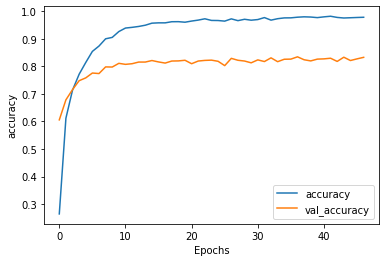

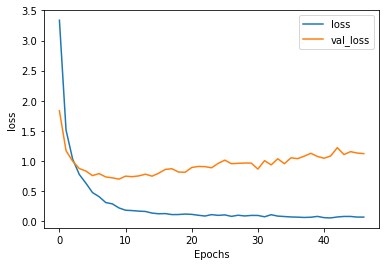

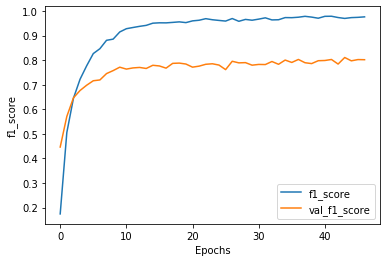

In [51]:
cnn_train_non_static_d2v.train_plot(model, histroy)

In [52]:
cnn_train_non_static_d2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 0.9738 - accuracy: 0.8426 - f1_score: 0.8191


### optimizer radam

In [53]:
cnn_train_non_static_d2v = CNNTrain(vocab_size=vocab_size, 
                                    train_mode='non_static', 
                                    embedding_matrix=doc_vectorizer,
                                    word_index=word_index,
                                    optimizer='radam',
                                    pre_trained_mode='d2v')

big_class
output_dim :  43
./model_save/cnn_model/
word index size :  30079
29582 496
train_mode : non_static, optimizer : radam, pre-trained_mode : d2v, trainable: True, model_name : cnn_non_static_radam_d2v


In [54]:
model, histroy = cnn_train_non_static_d2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 43, 'model_name': 'cnn_non_static_radam_d2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92332149,  0.07046572, -0.11218019, ..., -0.90327078,
        -1.37625957,  0.42820612],
       [ 0.63682806,  0.139101  , -0.00578027, ...,  0.24532194,
        -0.9702155 ,  0.07838579],
       ...,
       [ 0.65864688, -0.21765059, -0.18377091, ...,  1.63431156,
        -0.64432347, -0.49664205],
       [-0.0473938 ,  0.43745145,  0.08863429, ..., -0.00531029,
         0.05797287, -0.49470472],
       [-0.37837368,  0.21734855, -0.05201286, ...,  0.09690577,
         0.74238676,  0.81506521]]), 'trainable': True}
./model_save/cnn_model/cnn_non_static_radam_d2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================]

135/135 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.9279 - f1_score: 0.9182
Epoch 00019: val_accuracy did not improve from 0.80862
135/135 [==============================] - 17s 126ms/step - loss: 0.2198 - accuracy: 0.9279 - f1_score: 0.9182 - val_loss: 0.7927 - val_accuracy: 0.8049 - val_f1_score: 0.7646
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9305 - f1_score: 0.9201
Epoch 00020: val_accuracy improved from 0.80862 to 0.81325, saving model to ./model_save/cnn_model/cnn_non_static_radam_d2v/weights.h5
135/135 [==============================] - 18s 130ms/step - loss: 0.2174 - accuracy: 0.9305 - f1_score: 0.9201 - val_loss: 0.8129 - val_accuracy: 0.8133 - val_f1_score: 0.7747
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.9407 - f1_score: 0.9297
Epoch 00021: val_accuracy did not improve from 0.81325
135/135 [==============================] - 17s 126ms/step - los

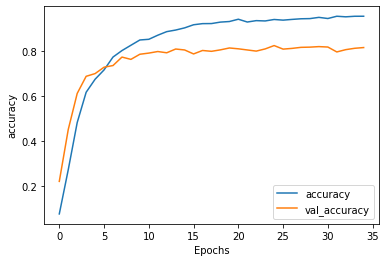

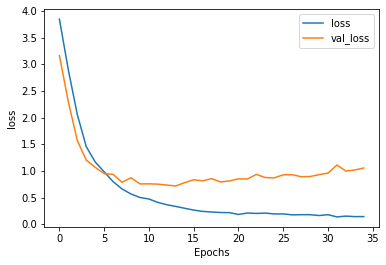

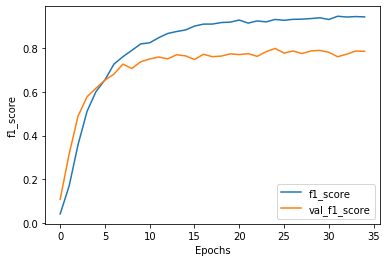

In [55]:
cnn_train_non_static_d2v.train_plot(model, histroy)

In [56]:
cnn_train_non_static_d2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 20ms/step - loss: 0.7849 - accuracy: 0.8268 - f1_score: 0.8073: 1s - loss: 0.7889 - accuracy: 0.8194 - f1_score: 0.791 - ETA: 1s - loss: 0.7856 - accuracy: 0.8188
